In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import logging
from sklearn.impute import KNNImputer, SimpleImputer

mpl.rcParams['figure.dpi'] = 150
logging.disable(logging.CRITICAL)

In [147]:
df = pd.read_csv('../data/eu_regional_data.csv', index_col = 'region_name')
df.head()

,GDP,Country,EU Region,GDP per Capita,Unemployment %,Life Expectancy,Doctors per 100000,Fatal Road Accidents per Million,Tertiary Educational Attainment %,Population Density,People at Risk of Poverty %,Regular Internet Users %
region_name,,,,,,,,,,,,
Abruzzo,30.89,IT,Southern Europe,24000.0,9.3,82.9,435.45,46.0,21.2,120.5,25.0,78.0
Alentejo,12.44,PT,Southern Europe,17700.0,6.6,80.2,310.06,135.0,21.4,22.7,22.0,70.0
Algarve,8.71,PT,Southern Europe,19900.0,8.3,80.3,419.03,75.0,24.4,88.9,23.2,76.0
Alsace,59.58,FR,Western Europe,31000.0,7.1,81.8,362.21,30.0,39.0,230.6,NaN,75.0
Andalucía,150.56,ES,Southern Europe,17700.0,21.7,81.7,371.83,30.0,32.5,97.4,37.7,84.0


In [148]:
'''
cols_num = ['GDP', 'GDP per Capita', 'Unemployment %',
            'Life Expectancy', 'Doctors per 100000',
            'Fatal Road Accidents per Million',
            'Tertiary Educational Attainment %',
            'Population Density', 'People at Risk of Poverty %',
            'Regular Internet Users %']

imputer = SimpleImputer()
df[cols_num] = imputer.fit_transform(df[cols_num]) '''

"\ncols_num = ['GDP', 'GDP per Capita', 'Unemployment %',\n            'Life Expectancy', 'Doctors per 100000',\n            'Fatal Road Accidents per Million',\n            'Tertiary Educational Attainment %',\n            'Population Density', 'People at Risk of Poverty %',\n            'Regular Internet Users %']\n\nimputer = SimpleImputer()\ndf[cols_num] = imputer.fit_transform(df[cols_num]) "

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 242 entries, Abruzzo to Южен централен (Yuzhen tsentralen)
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   GDP                                242 non-null    float64
 1   Country                            242 non-null    object 
 2   EU Region                          242 non-null    object 
 3   GDP per Capita                     242 non-null    float64
 4   Unemployment %                     238 non-null    float64
 5   Life Expectancy                    238 non-null    float64
 6   Doctors per 100000                 173 non-null    float64
 7   Fatal Road Accidents per Million   239 non-null    float64
 8   Tertiary Educational Attainment %  238 non-null    float64
 9   Population Density                 239 non-null    float64
 10  People at Risk of Poverty %        183 non-null    float64
 11  Regular Internet Users %  

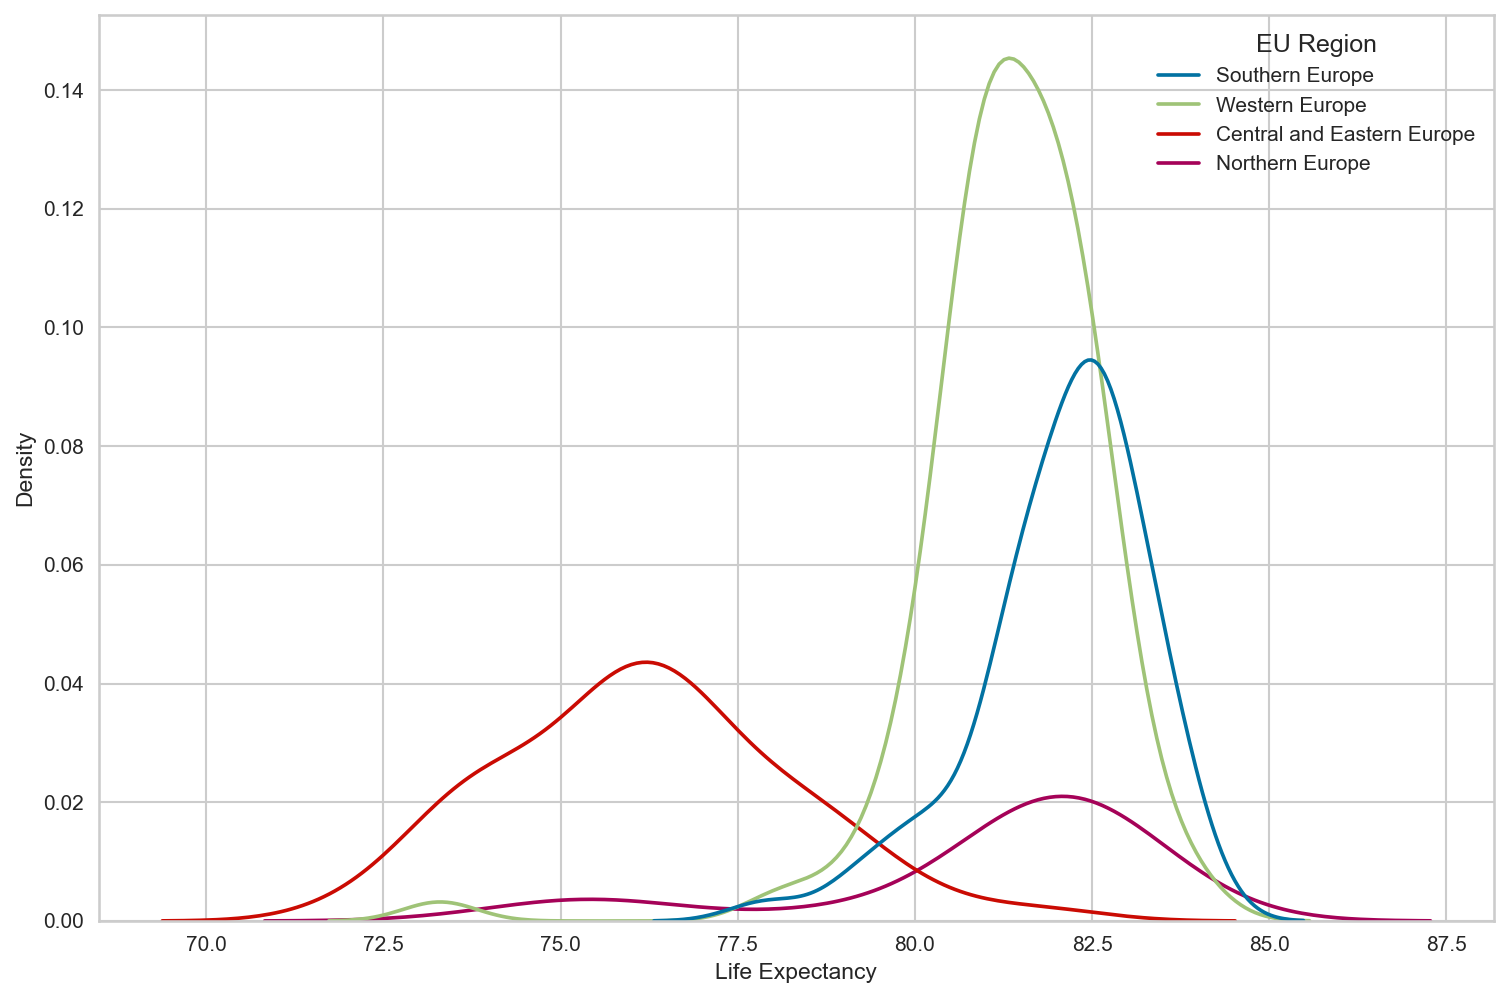

In [150]:
fig, ax = plt.subplots(figsize = (12,8))
sns.kdeplot(data = df, x = 'Life Expectancy',
             hue = 'EU Region', ax = ax)
plt.show()

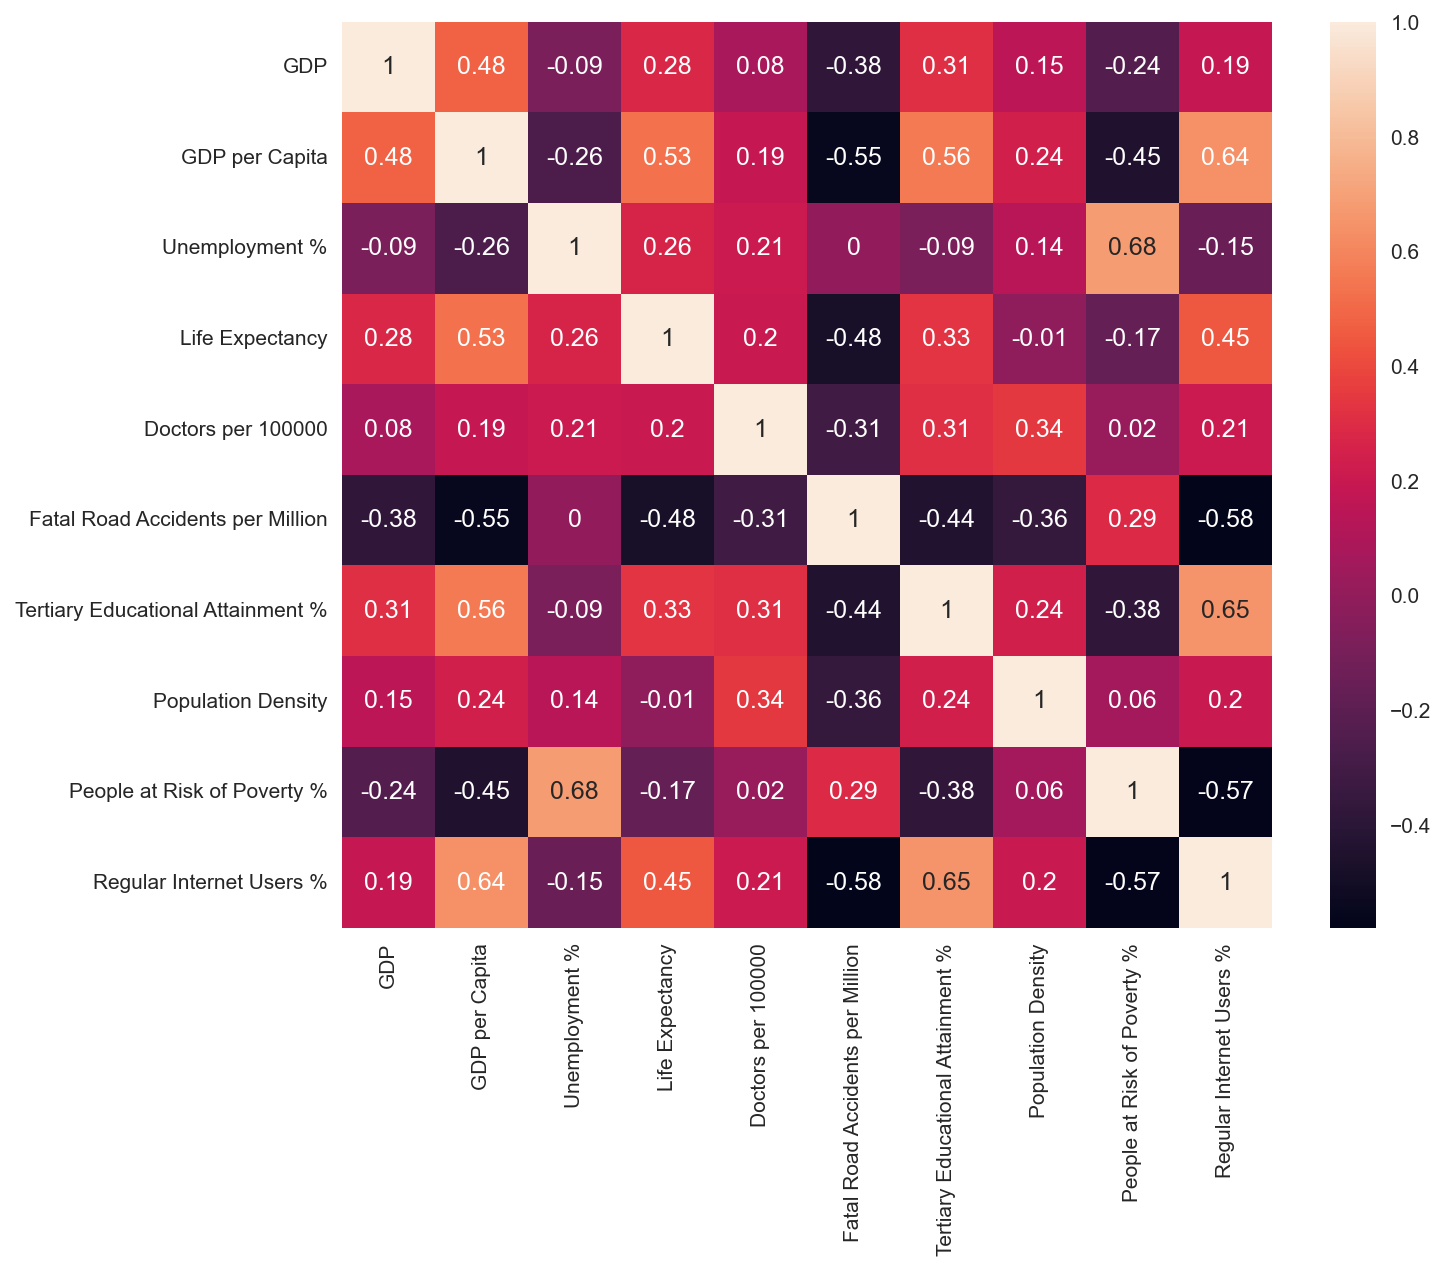

In [151]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr().round(2), annot=True)
plt.show()

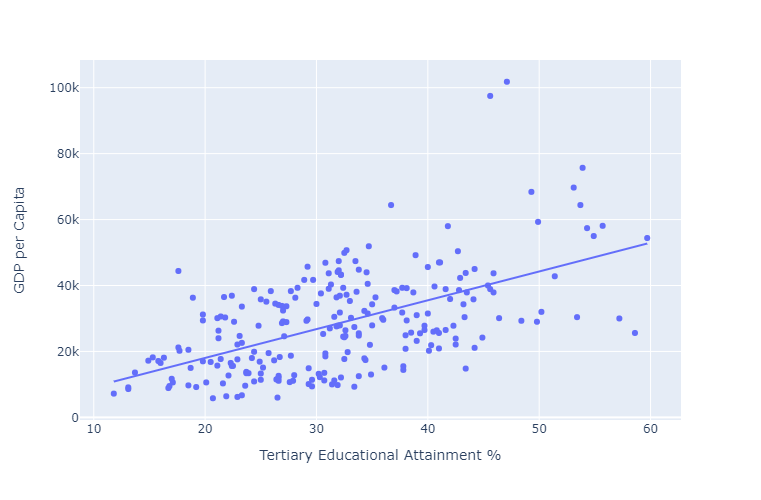

In [152]:
df.plot(kind = 'scatter', backend = 'plotly',
        x = 'Tertiary Educational Attainment %', y = 'GDP per Capita',
        trendline = 'ols',
        height = 500)